In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
import click
import os
import time
import matplotlib.pyplot as plt
import scipy.stats as stats
import logging
import random
import pickle

from datetime import datetime, timedelta


pd.options.mode.chained_assignment = None 

# Import data

In [22]:
with open('cape_town/parameters.json') as json_file:
    param_file = json.load(json_file)

emp_fatality_curve = param_file['empirical_fatalities']
empirical_population = param_file['empirical_population']

In [29]:
sim_fatality_curves = {}
sim_compl = {}
for x in range(4):
    sim_dead_curve = pd.DataFrame(pd.read_csv('output_data/cape_town/seed{}quantities_state_time.csv'.format(x))['d'] * (empirical_population / param_file['number_of_agents']))
    sim_dead_curve = sim_dead_curve.diff().ewm(span=5).mean()
    
    sim_compliance = pd.read_csv('output_data/cape_town/seed{}quantities_state_time.csv'.format(x))['compliance']
    sim_fatality_curves['simulation ' + str(x)]= list(sim_dead_curve['d'])
    sim_compl['simulation ' + str(x)]= list(sim_compliance)

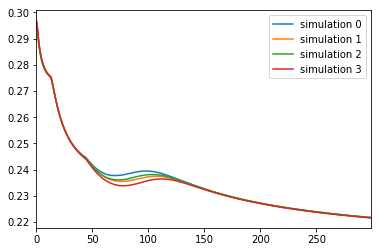

In [31]:
pd.DataFrame(sim_compl).plot()

In [24]:
simulations = pd.DataFrame(sim_fatality_curves)#.transpose()

# quick graphs

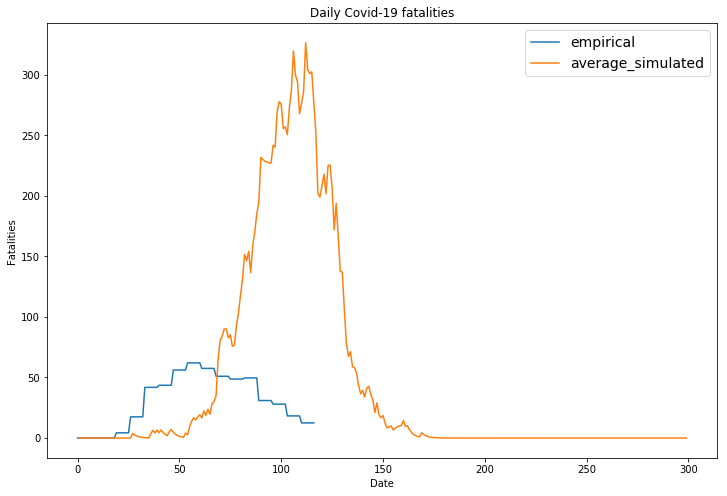

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

ax.plot(range(len(emp_fatality_curve)), emp_fatality_curve, label='empirical')
ax.plot(simulations.index, simulations.mean(axis=1), label='average_simulated')

# for idx, curve in enumerate(sim_fatality_curves):
#     ax.plot(range(len(curve)), curve, label='sim {}'.format(idx))

# ax.plot(curves.index[:160], curves['excess_d_ct'].iloc[:160].ewm(span = 20).mean(), label='observed fatalities')
# ax.plot(curves.index[:160], typical_model_predictions, label='typical model')
# ax.plot(curves.index[:160], curves['sabcom_ct'].iloc[:160].ewm(span = 20).mean(), label='sabcom')

# ax.axvline(curves.index[14], color='red', linestyle='--', label='lockdown relaxed to level 4')
# ax.axvline(curves.index[45], color='orange', linestyle='--', label='lockdown relaxed to level 3')
# ax.axvline(curves.index[123], color='green', linestyle='--', label='lockdown relaxed to level 2')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Fatalities",
       title="Daily Covid-19 fatalities")

ax.legend(loc='best', fontsize='14')

#ax.set_ylim(0, 90)

# Define the date format
#date_form = DateFormatter("%b")
#ax.xaxis.set_major_formatter(date_form)

#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))

fig.savefig('cuuurves_replication.png')